In [49]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [10]:
import pandas as pd

data = pd.read_csv('olimpic_medals.csv')

In [14]:
data.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


In [111]:
data.Discipline.unique()

array(['Swimming', 'Athletics', 'Cycling Road', 'Cycling Track',
       'Fencing', 'Artistic G.', 'Shooting', 'Tennis', 'Weightlifting',
       'Wrestling Gre-R', 'Water polo', 'Archery', 'Basque Pelota',
       'Cricket', 'Croquet', 'Jumping', 'Football', 'Golf', 'Polo',
       'Rowing', 'Rugby', 'Sailing', 'Tug of War', 'Diving', 'Boxing',
       'Lacrosse', 'Roque', 'Wrestling Free.', 'Hockey', 'Jeu de Paume',
       'Rackets', 'Figure skating', 'Water Motorspor', 'Dressage',
       'Eventing', 'Modern Pentath.', 'Vaulting', 'Ice Hockey',
       'Basketball', 'Canoe / Kayak F', 'Handball', 'Judo', 'Volleyball',
       'Canoe / Kayak S', 'Synchronized S.', 'Rhythmic G.',
       'Table Tennis', 'Badminton', 'Baseball', 'Mountain Bike',
       'Softball', 'Beach volley.', 'Trampoline', 'Taekwondo',
       'Triathlon', 'BMX'], dtype=object)

##  1. Сколько медалей выиграл Jesse Owens в 1936?

In [21]:
data[(data['Athlete'] == 'OWENS, Jesse') & (data['Edition'] == 1936)]['Medal'].count()

4

## 2. Какая страна выйграла большинство золотых медалей мужчинами в бадминтоне?

In [102]:
tmp = data[(data.Gender == 'Men') & (data.Discipline == 'Badminton') & (data.Medal == 'Gold')][['NOC', 'Medal']]
tmp = tmp.groupby('NOC').count()
tmp[tmp.Medal == tmp.Medal.max()]

,Medal
NOC,
INA,8


## 3. Какие три страны выйграли большинство медалей в последние годы (с 1984 по 2008)?

In [37]:
tmp = data[(data.Edition >= 1984) & (data.Edition <= 2008)][['NOC', 'Medal']]
tmp = tmp.groupby('NOC').count().sort_values('Medal', ascending=False)
tmp[:3]

,Medal
NOC,
USA,1837
AUS,762
GER,691


## 4. Покажите мужчин золотых медалистов по 100m. Выведите результаты по убыванию года выйгрыша. Покажите город в котором проходила олимпиала, год, имя атлета и страну за которую он выступал.

In [40]:
tmp = data[(data.Gender == 'Men') & (data.Event == '100m') & (data.Medal == 'Gold')]
tmp = tmp[['City', 'Edition', 'Athlete', 'NOC']].set_index('Athlete')
tmp.sort_values('Edition', ascending=False)

,City,Edition,NOC
Athlete,,,
"BOLT, Usain",Beijing,2008,JAM
"GATLIN, Justin",Athens,2004,USA
"GREENE, Maurice",Sydney,2000,USA
"BAILEY, Donovan",Atlanta,1996,CAN
"CHRISTIE, Linford",Barcelona,1992,GBR
"LEWIS, Carl",Seoul,1988,USA
"LEWIS, Carl",Los Angeles,1984,USA
"WELLS, Allan",Moscow,1980,GBR
"CRAWFORD, Hasely",Montreal,1976,TRI


## 5. Как много медалей было выйграно мужчинами и женщинами в истории олимпиады. Как много золотых, серебрянных и бронзовых медалей было выйграно каждым полом?

In [124]:
data.groupby('Gender').count().loc[:, ['Medal']]
data.groupby(['Gender', 'Medal']).agg({'Medal': 'count'})

,Medal
Gender,
Men,21721
Women,7495


Medal
Gender Medal        
Men    Bronze   7175
       Gold     7365
       Silver   7181
Women  Bronze   2514
       Gold     2485
       Silver   2496

## 6. Используя groupby(), постройте график числа всех медалей выйгранных на каждой олимпиаде.

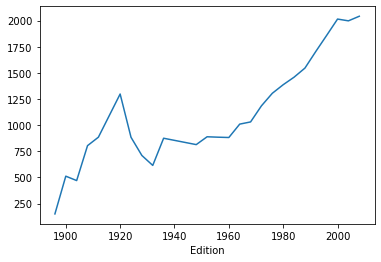

In [94]:
data.groupby('Edition').count().Medal.plot()

## 7. Создайте список показывающий число всех медалей выйгранных каждой страной в течение всей истории олимпийских игр. Для каждой страны, необходимо показать год первой и последней заработанной медали.

In [98]:
data.groupby('NOC').agg({'Medal': 'count', 'Edition': ['min', 'max']})

Medal Edition      
    count     min   max
NOC                    
AFG     1    2008  2008
AHO     1    1988  1988
ALG    14    1984  2008
ANZ    29    1908  1912
ARG   239    1924  2008
..    ...     ...   ...
VIE     2    2000  2008
YUG   435    1924  2000
ZAM     2    1984  1996
ZIM    23    1980  2008
ZZX    48    1896  1904

[138 rows x 3 columns]

## 8. Атлеты выйгравшие медали в Beijing на дистанции 100m или 200m

In [107]:
data[(data.City == 'Beijing') & ((data.Event == '100m') | (data.Event == '200m'))].loc[:, ['Athlete', 'Event']]

,Athlete,Event
27551,"DIX, Walter",100m
27552,"BOLT, Usain",100m
27553,"THOMPSON, Richard",100m
27554,"FRASER, Shelly-ann",100m
27555,"SIMPSON, Sherone",100m
27556,"STEWART, Kerron",100m
27569,"DIX, Walter",200m
27570,"BOLT, Usain",200m
27571,"CRAWFORD, Shawn",200m
27572,"STEWART, Kerron",200m


## 9. Постройте график числа золотых медалей выйгранных США мужчинами и женщинами в атлетике.

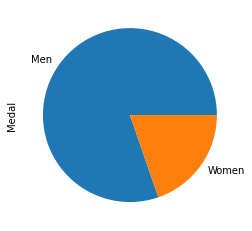

In [113]:
tmp = data[(data.NOC == 'USA') & (data.Medal == 'Gold') & (data.Discipline == 'Athletics')]
tmp.groupby('Gender').count().Medal.plot.pie()

## 10. Постройте график 5 атлетов которые выйграли большинство золотых медалей.

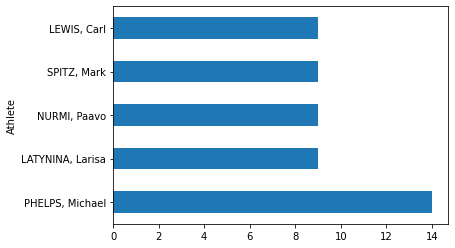

In [118]:
data[data.Medal == 'Gold'].groupby('Athlete').count().Medal.sort_values(ascending=False)[:5].plot.barh()

## 11. Покажите суммарное количество медалей выйгранных странами в последних олимпийских играх.

In [120]:
data[data.Edition == data.Edition.max()].groupby('NOC').count()[['Medal']]

,Medal
NOC,
AFG,1
ALG,2
ARG,51
ARM,6
AUS,149
...,...
USA,315
UZB,6
VEN,1


## 12. Постройте таблицу в которой по годам всех олимпиад покажите топовых атлетов США(1 атлет на год) по общему количеству медалей. Включите дисциплину атлета.

Сломал голову об мультииндексы, не разобрался.

In [177]:
tmp = data[data.NOC == 'USA'].groupby(['Edition', 'Athlete'])
max_meds = data[data.NOC == 'USA'].groupby(['Edition', 'Athlete']).agg({'Medal': 'count'}).max(level=0)


,0,1
0,"(1896, BLAKE, Arthur)",City Edition Sport Discipline ...
1,"(1896, BURKE, Thomas)",City Edition Sport Discipline ...
2,"(1896, CLARK, Ellery)",City Edition Sport Discipline ...
3,"(1896, CONNOLLY, James)",City Edition Sport Discipline ...
4,"(1896, CURTIS, Thomas)",City Edition Sport Discipline ...
...,...,...
3544,"(2008, WILLOUGHBY, Kim)",City Edition Sport Disciplin...
3545,"(2008, WINDES, Elsie)",City Edition Sport Discipline ...
3546,"(2008, WINEBERG, Mary)",City Edition Sport Discipline ...
3547,"(2008, WRIGHT, Adam)",City Edition Sport Discipline ...
